## Question 1

#### Step : 1,2,3

In [6]:
import pandas as pd
from tabulate import tabulate
link = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
file_read = pd.read_csv(link, sep='|')
print(file_read)
print(tabulate(file_read, headers='keys', tablefmt='pretty'))

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]
+-----+---------+-----+--------+---------------+----------+
|     | user_id | age | gender |  occupation   | zip_code |
+-----+---------+-----+--------+---------------+----------+
|  0  |    1    | 24  |   M    |  technician   |  85711   |
|  1  |    2    | 53  |   F    |     other     |  94043   |
|  2  |    3    | 23  |   M    |    writer     |  32067   |
|  3  |    4    | 24  |   M 

#### step 4

In [8]:
mean_age_by_occupation = file_read.groupby('occupation')['age'].mean()
mean_age_df = mean_age_by_occupation.reset_index()
print(tabulate(mean_age_df, headers='keys', tablefmt='pretty'))

+----+---------------+--------------------+
|    |  occupation   |        age         |
+----+---------------+--------------------+
| 0  | administrator | 38.74683544303797  |
| 1  |    artist     | 31.392857142857142 |
| 2  |    doctor     | 43.57142857142857  |
| 3  |   educator    | 42.01052631578948  |
| 4  |   engineer    | 36.38805970149254  |
| 5  | entertainment | 29.22222222222222  |
| 6  |   executive   |      38.71875      |
| 7  |  healthcare   |      41.5625       |
| 8  |   homemaker   | 32.57142857142857  |
| 9  |    lawyer     |       36.75        |
| 10 |   librarian   |        40.0        |
| 11 |   marketing   | 37.61538461538461  |
| 12 |     none      | 26.555555555555557 |
| 13 |     other     | 34.523809523809526 |
| 14 |  programmer   | 33.121212121212125 |
| 15 |    retired    | 63.07142857142857  |
| 16 |   salesman    | 35.666666666666664 |
| 17 |   scientist   | 35.54838709677419  |
| 18 |    student    | 22.081632653061224 |
| 19 |  technician   | 33.148148

#### Step 5

In [11]:
file_read['is_male'] = (file_read['gender'] == 'M').astype(int)
male_ratio_by_occupation = file_read.groupby('occupation')['is_male'].mean()

male_ratio_df = pd.DataFrame({'occupation': male_ratio_by_occupation.index, 'male_ratio': male_ratio_by_occupation.values})

male_ratio_df = male_ratio_df.sort_values(by='male_ratio', ascending=False)

for index, row in male_ratio_df.iterrows():
    print(f"Occupation: {row['occupation']}, Male Ratio: {row['male_ratio']:.2%}")


Occupation: doctor, Male Ratio: 100.00%
Occupation: engineer, Male Ratio: 97.01%
Occupation: technician, Male Ratio: 96.30%
Occupation: retired, Male Ratio: 92.86%
Occupation: programmer, Male Ratio: 90.91%
Occupation: executive, Male Ratio: 90.62%
Occupation: scientist, Male Ratio: 90.32%
Occupation: entertainment, Male Ratio: 88.89%
Occupation: lawyer, Male Ratio: 83.33%
Occupation: salesman, Male Ratio: 75.00%
Occupation: educator, Male Ratio: 72.63%
Occupation: student, Male Ratio: 69.39%
Occupation: other, Male Ratio: 65.71%
Occupation: marketing, Male Ratio: 61.54%
Occupation: writer, Male Ratio: 57.78%
Occupation: none, Male Ratio: 55.56%
Occupation: administrator, Male Ratio: 54.43%
Occupation: artist, Male Ratio: 53.57%
Occupation: librarian, Male Ratio: 43.14%
Occupation: healthcare, Male Ratio: 31.25%
Occupation: homemaker, Male Ratio: 14.29%


#### Step 6

In [13]:
age_range_by_occupation = file_read.groupby('occupation')['age'].agg(['min', 'max'])
print(tabulate(age_range_by_occupation, headers='keys', tablefmt='pretty'))

+---------------+-----+-----+
|  occupation   | min | max |
+---------------+-----+-----+
| administrator | 21  | 70  |
|    artist     | 19  | 48  |
|    doctor     | 28  | 64  |
|   educator    | 23  | 63  |
|   engineer    | 22  | 70  |
| entertainment | 15  | 50  |
|   executive   | 22  | 69  |
|  healthcare   | 22  | 62  |
|   homemaker   | 20  | 50  |
|    lawyer     | 21  | 53  |
|   librarian   | 23  | 69  |
|   marketing   | 24  | 55  |
|     none      | 11  | 55  |
|     other     | 13  | 64  |
|  programmer   | 20  | 63  |
|    retired    | 51  | 73  |
|   salesman    | 18  | 66  |
|   scientist   | 23  | 55  |
|    student    |  7  | 42  |
|  technician   | 21  | 55  |
|    writer     | 18  | 60  |
+---------------+-----+-----+


#### Step 7

In [17]:
mean_age_by_occupation_sex = file_read.groupby(['occupation', 'gender'])['age'].mean()
mean_age_by_occupation_sex_df = mean_age_by_occupation_sex.reset_index()
print(tabulate(mean_age_by_occupation_sex_df, headers='keys', tablefmt='pretty'))

+----+---------------+--------+--------------------+
|    |  occupation   | gender |        age         |
+----+---------------+--------+--------------------+
| 0  | administrator |   F    | 40.638888888888886 |
| 1  | administrator |   M    | 37.16279069767442  |
| 2  |    artist     |   F    | 30.307692307692307 |
| 3  |    artist     |   M    | 32.333333333333336 |
| 4  |    doctor     |   M    | 43.57142857142857  |
| 5  |   educator    |   F    | 39.11538461538461  |
| 6  |   educator    |   M    | 43.10144927536232  |
| 7  |   engineer    |   F    |        29.5        |
| 8  |   engineer    |   M    |        36.6        |
| 9  | entertainment |   F    |        31.0        |
| 10 | entertainment |   M    |        29.0        |
| 11 |   executive   |   F    |        44.0        |
| 12 |   executive   |   M    | 38.172413793103445 |
| 13 |  healthcare   |   F    | 39.81818181818182  |
| 14 |  healthcare   |   M    |        45.4        |
| 15 |   homemaker   |   F    | 34.16666666666

#### Step 8

In [16]:
gender_percentage_by_occupation = file_read.groupby(['occupation', 'gender'])['is_male'].count() / file_read.groupby('occupation')['is_male'].count() * 100
gender_percentage_by_occupation = gender_percentage_by_occupation.unstack()
gender_percentage_by_occupation.columns = ['Female (%)', 'Male (%)']
print(tabulate(gender_percentage_by_occupation, headers='keys', tablefmt='pretty'))


+---------------+--------------------+--------------------+
|  occupation   |     Female (%)     |      Male (%)      |
+---------------+--------------------+--------------------+
| administrator | 45.56962025316456  | 54.43037974683544  |
|    artist     | 46.42857142857143  | 53.57142857142857  |
|    doctor     |        nan         |       100.0        |
|   educator    | 27.368421052631582 | 72.63157894736842  |
|   engineer    | 2.9850746268656714 | 97.01492537313433  |
| entertainment | 11.11111111111111  | 88.88888888888889  |
|   executive   |       9.375        |       90.625       |
|  healthcare   |       68.75        |       31.25        |
|   homemaker   | 85.71428571428571  | 14.285714285714285 |
|    lawyer     | 16.666666666666664 | 83.33333333333334  |
|   librarian   | 56.86274509803921  | 43.13725490196079  |
|   marketing   | 38.46153846153847  | 61.53846153846154  |
|     none      | 44.44444444444444  | 55.55555555555556  |
|     other     | 34.285714285714285 | 6

## Question 2

#### Step: 1,2,3,4

In [18]:
import pandas as pd
address = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(address)
goals = euro12['Goals']
print("Goals:\n", goals)

Goals:
 0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


#### Step 5

In [19]:
teams = euro12['Team'].nunique()
print("\nParticipated Teams:", teams)


Participated Teams: 16


#### Step 6

In [20]:
column = len(euro12.columns)
print("\nNumber of Columns:", column)


Number of Columns: 35


#### Step 7

In [22]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

print(discipline)

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


#### Step 8

In [23]:
sort = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])
print(sort)

                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


#### Step 9

In [24]:
mean_yellow_cards = euro12['Yellow Cards'].mean()
print("Mean Yellow Cards given per Team:", mean_yellow_cards)


Mean Yellow Cards given per Team: 7.4375


#### Step 10

In [25]:
goal = euro12[euro12['Goals'] > 6]
print("\nTeams with more than 6 goals:\n",goal)


Teams with more than 6 goals:
        Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0       17        17   

    Players Used  
5             17  
13

#### Step 11

In [27]:
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]
print("\nTeams starting with 'G':\n", teams_starting_with_G)


Teams starting with 'G':
       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2

#### Step 12

In [31]:
first_seven_columns = euro12.iloc[:, :7]
print("\n 7 Columns:\n", first_seven_columns)


 7 Columns:
                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Sp

#### Step 13

In [33]:
without_last_3_columns = euro12.iloc[:, :-3]
print(without_last_3_columns)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

#### Step 14

In [34]:
shooting_teams = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print(tabulate(shooting_teams, headers='keys', tablefmt='pretty'))

+----+---------+-------------------+
|    |  Team   | Shooting Accuracy |
+----+---------+-------------------+
| 3  | England |       50.0%       |
| 7  |  Italy  |       43.0%       |
| 12 | Russia  |       22.5%       |
+----+---------+-------------------+


## Question 3

In [39]:
import pandas as pd
import numpy as np

S1= pd.Series(np.random.randint(1, 5, size=100))
S2 = pd.Series(np.random.randint(1, 4, size=100))
S3 = pd.Series(np.random.randint(10000, 30001, size=100))

housing_data = pd.concat([S1, S2, S3], axis=1)
housing_data.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

bigcolumn = pd.concat([S1, S2, S3], axis=0)
print(bigcolumn.index.max() == 99)
print("Housing DataFrame:\n", housing_data)
print("\nBigcolumn DataFrame:\n", bigcolumn)


True
Housing DataFrame:
     bedrs  bathrs  price_sqr_meter
0       1       3            12753
1       2       1            10152
2       4       3            22606
3       3       2            11349
4       3       1            13042
..    ...     ...              ...
95      1       3            27713
96      1       1            11841
97      4       3            19329
98      1       3            28934
99      2       1            16415

[100 rows x 3 columns]

Bigcolumn DataFrame:
 0         1
1         2
2         4
3         3
4         3
      ...  
95    27713
96    11841
97    19329
98    28934
99    16415
Length: 300, dtype: int32


## Question 4

In [43]:
import pandas as pd
import numpy as np

file_path = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data"
data = pd.read_table(file_path, sep='\s+', parse_dates=[[0, 1, 2]])

data.set_index('Yr_Mo_Dy', inplace=True)

def fix_year(year):
    if year.year > 1989:
        return year - pd.DateOffset(years=100)
    return year

data.index = data.index.map(fix_year)

data.index = pd.to_datetime(data.index)

missing_values = data.isnull().sum()
non_missing_values = data.count().sum()
mean_windspeed = data.mean().mean()
loc_stats = data.aggregate(['min', 'max', 'mean', 'std'])
day_stats = data.resample('D').aggregate(['min', 'max', 'mean', 'std'])

january_avg = data.resample('M').mean()
january_avg = january_avg[january_avg.index.month == 1]
january_avg = january_avg.groupby(january_avg.index.year).mean()

yearly_data = data.resample('Y').mean()
monthly_data = data.resample('M').mean()
weekly_data = data.resample('W').mean()
weekly_stats = weekly_data[:52].aggregate(['min', 'max', 'mean', 'std'])

print("Missing Values:\n", missing_values)
print("\nTotal Non-Missing Values:", non_missing_values)
print("\nMean Windspeed of the Entire Dataset:", mean_windspeed)
print("\nLocation Statistics:\n", loc_stats)
print("\nDay Statistics:\n", day_stats)
print("\nJanuary Average for Each Year:\n", january_avg)
print("\nYearly Data:\n", yearly_data)
print("\nMonthly Data:\n", monthly_data)
print("\nWeekly Data:\n", weekly_data)
print("\nWeekly Statistics for the First 52 Weeks:\n", weekly_stats)


Missing Values:
 RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Total Non-Missing Values: 78857

Mean Windspeed of the Entire Dataset: 10.227982360836938

Location Statistics:
             RPT        VAL        ROS        KIL        SHA        BIR  \
min    0.670000   0.210000   1.500000   0.000000   0.130000   0.000000   
max   35.800000  33.370000  33.840000  28.460000  37.540000  26.160000   
mean  12.362987  10.644314  11.660526   6.306468  10.455834   7.092254   
std    5.618413   5.267356   5.008450   3.605811   4.936125   3.968683   

            DUB        CLA        MUL        CLO        BEL        MAL  
min    0.000000   0.000000   0.000000   0.040000   0.130000   0.670000  
max   30.370000  31.080000  25.880000  28.210000  42.380000  42.540000  
mean   9.797343   8.495053   8.493590   8.707332  13.121007  15.599079  
std    4.977555   4.499449   4.166872   4.503954   5.835037   6.699794  

Day Statist

## Question 5

In [45]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')
print("First 10 entries:\n", chipo.head(10))

observations = chipo.shape[0]
column = chipo.shape[1]
print("Columns:\n", chipo.columns.tolist())
print("Dataset Indexing:\n", chipo.index)

most_ordered_item = chipo['item_name'].value_counts().idxmax()
most_ordered_item_quantity = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
most_ordered_choice_description = chipo['choice_description'].value_counts().idxmax()
total_items_ordered = chipo['quantity'].sum()
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print("Item Price Type after Conversion:", chipo['item_price'].dtype)

budget = (chipo['quantity'] * chipo['item_price']).sum()
num_of_orders = chipo['order_id'].nunique()
average_revenue_per_order = budget / num_of_orders
num_different_items = chipo['item_name'].nunique()

print("\nNumber of Observations (Rows):", observations)
print("Number of Columns:", column)
print("Most-Ordered Item:", most_ordered_item)
print("Number of Items Ordered for Most-Ordered Item:", most_ordered_item_quantity)
print("Most Ordered Choice Description:", most_ordered_choice_description)
print("Total Items Ordered:", total_items_ordered)
print("Revenue for the Period:", budget)
print("Number of Orders:", num_of_orders)
print("Average Revenue Amount per Order:", average_revenue_per_order)
print("Number of Different Items Sold:", num_different_items)


First 10 entries:
    order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3           

## Question 6

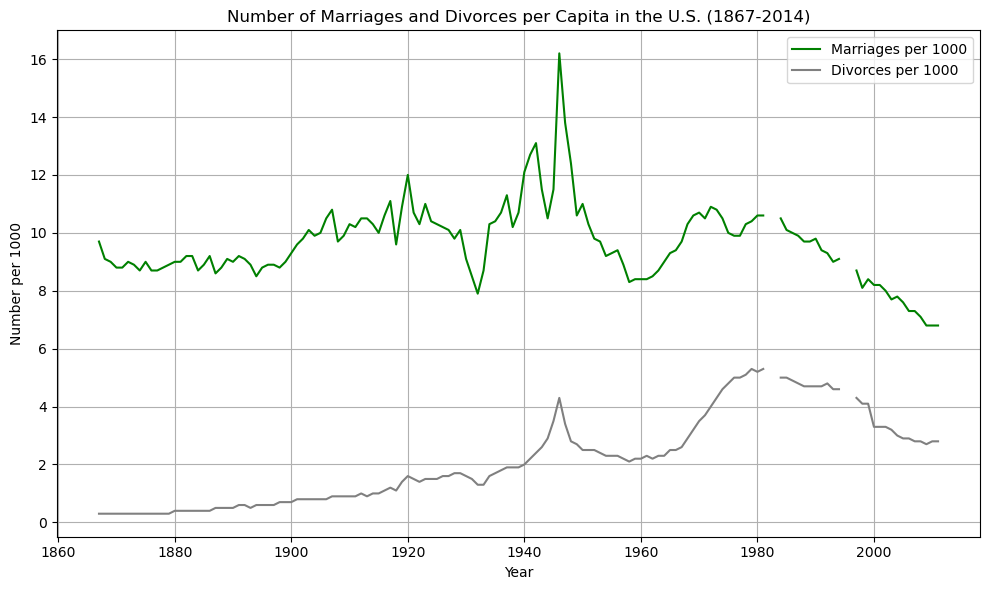

In [76]:

import pandas as pd
import matplotlib.pyplot as plt

file_path = "C:/Users/binay/OneDrive/Desktop/us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(file_path)
plt.figure(figsize=(10, 6))
marriage_color = 'green'
divorce_color = 'grey'
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000', color=marriage_color)
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000', color=divorce_color)

plt.xlabel('Year')
plt.ylabel('Number per 1000')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.show()


## Question 7

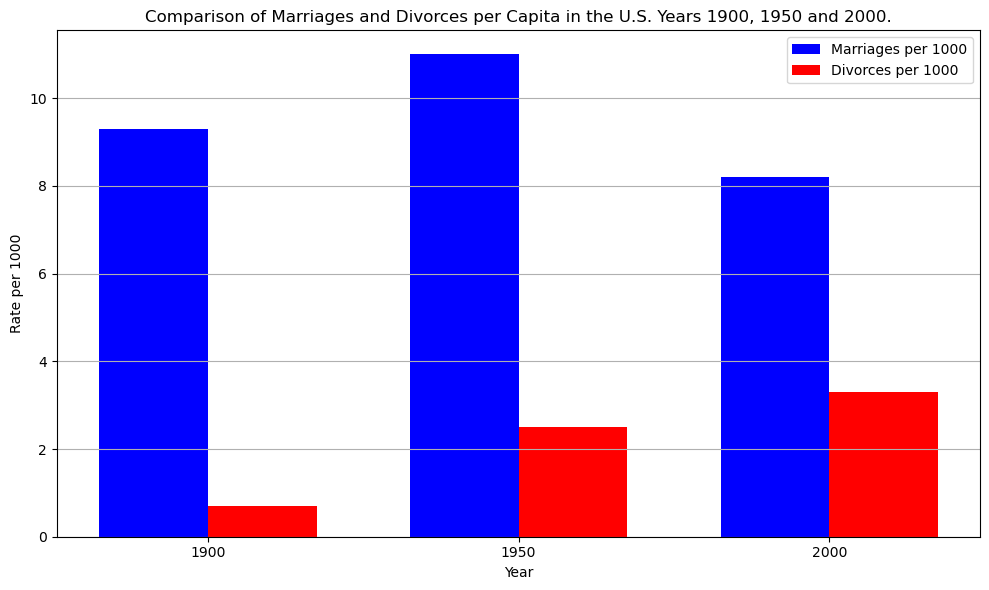

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = "C:/Users/binay/OneDrive/Desktop/us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(file_path)
selected_years = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(selected_years)]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(selected_years))
marriage_color = 'blue'
divorce_color = 'red'

# Create grouped bar chart
plt.bar(index - bar_width/2, filtered_data['Marriages_per_1000'], width=bar_width, label='Marriages per 1000', color=marriage_color)
plt.bar(index + bar_width/2, filtered_data['Divorces_per_1000'], width=bar_width, label='Divorces per 1000', color=divorce_color)

plt.title("Comparison of Marriages and Divorces per Capita in the U.S. Years 1900, 1950 and 2000.")
plt.xlabel("Year")
plt.ylabel("Rate per 1000")
plt.xticks(index, selected_years)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Question 8

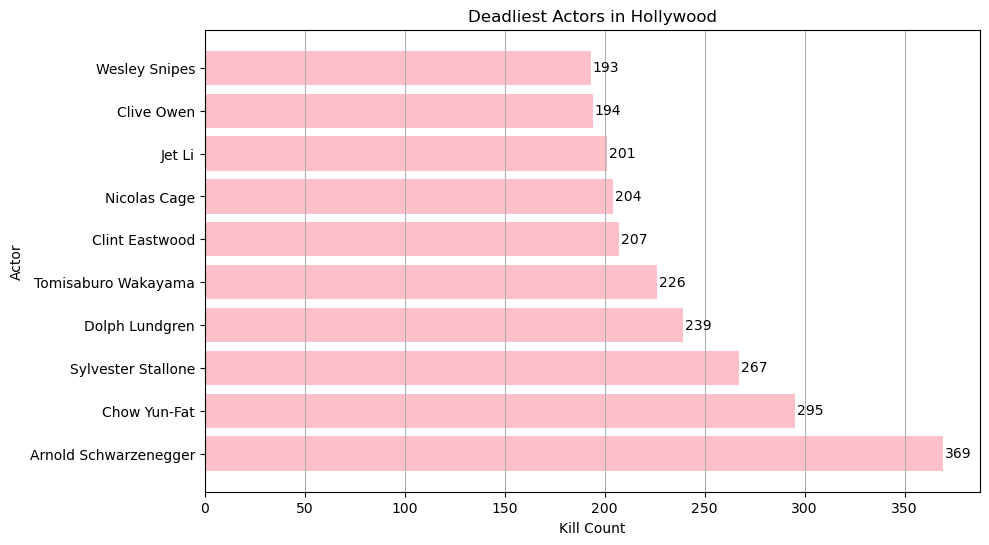

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = "C:/Users/binay/OneDrive/Desktop/actor_kill_counts.csv"
data = pd.read_csv(file_path)
sorted_data = data.sort_values(by='Count', ascending=False)
plt.figure(figsize=(10, 6))
custom_colors = ['pink' if count > 50 else 'red' for count in sorted_data['Count']]

bars = plt.barh(sorted_data['Actor'], sorted_data['Count'], color=custom_colors)

plt.title("Deadliest Actors in Hollywood")
plt.xlabel("Kill Count")
plt.ylabel("Actor")
plt.grid(axis='x')
for bar, value in zip(bars, sorted_data['Count']):
    plt.text(value + 1, bar.get_y() + bar.get_height() / 2, str(value), va='center', color='black', fontsize=10)

plt.show()

## Question 9

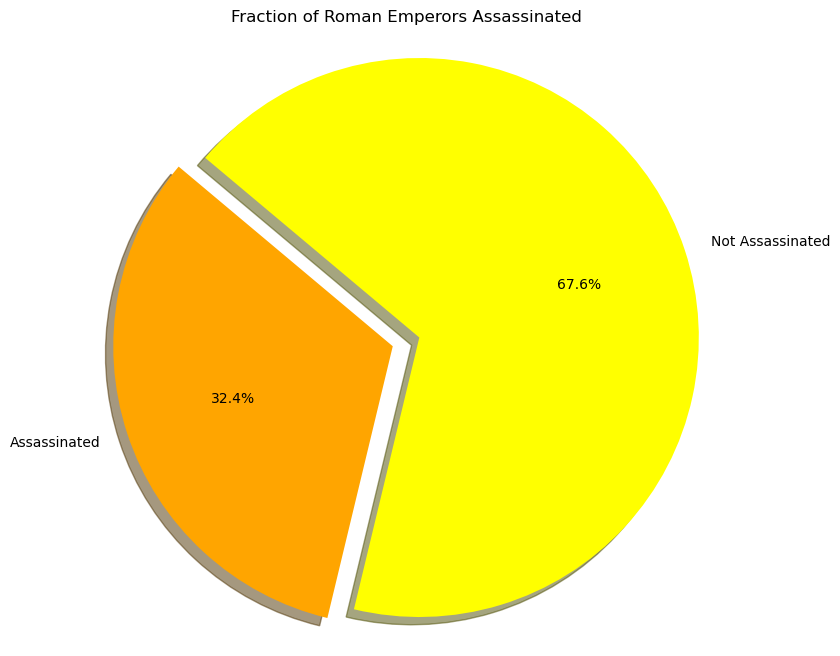

In [72]:

import pandas as pd
import matplotlib.pyplot as plt

file_path = "C:/Users/binay/OneDrive/Desktop/roman-emperor-reigns.csv"
data = pd.read_csv(file_path)
total_emperors = len(data)
assassinated_emperors = len(data[data['Cause_of_Death'] == 'Assassinated'])
not_assassinated_emperors = total_emperors - assassinated_emperors

labels = ['Assassinated', 'Not Assassinated']
sizes = [assassinated_emperors, not_assassinated_emperors]
colors = ['orange', 'yellow']
explode = (0.1, 0)  

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Fraction of Roman Emperors Assassinated")

plt.axis('equal')

plt.show()


## Question 10

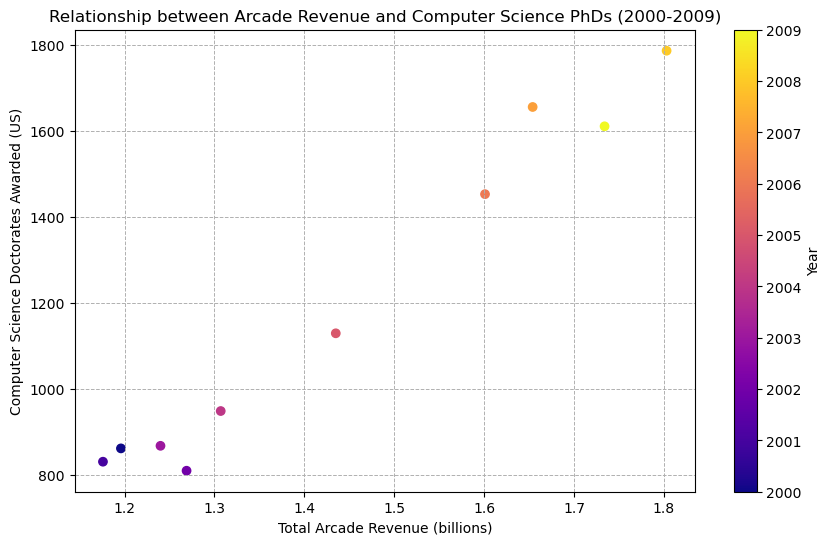

In [80]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "C:/Users/binay/OneDrive/Desktop/arcade-revenue-vs-cs-doctorates.csv"
data = pd.read_csv(file_path)

filtered_data = data[(data['Year'] >= 2000) & (data['Year'] <= 2009)]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=filtered_data['Total Arcade Revenue (billions)'],
    y=filtered_data['Computer Science Doctorates Awarded (US)'],
    c=filtered_data['Year'],  # Use year for color mapping
    cmap='plasma'
)

plt.title("Relationship between Arcade Revenue and Computer Science PhDs (2000-2009)")
plt.xlabel("Total Arcade Revenue (billions)")
plt.ylabel("Computer Science Doctorates Awarded (US)")

color_bar = plt.colorbar(scatter, label='Year')

plt.grid(linestyle='--', linewidth=0.7)

plt.show()
